# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng=[]
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
record=0
Set=1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {record} of Set {Set} |  {city}")
        record=record+1
        if record ==50:
            record=0
            Set=Set+1
    except:
        print(f"City {city} not found. Skipping...")
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        continue
print("---------------------------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------------------------")


#Include a print log of each city as it'sbeing processed (with the city number and city name).
        

Processing Record 0 of Set 1 |  port alfred
Processing Record 1 of Set 1 |  avarua
Processing Record 2 of Set 1 |  busselton
Processing Record 3 of Set 1 |  blagoyevo
City tapaua not found. Skipping...
Processing Record 4 of Set 1 |  eisenberg
Processing Record 5 of Set 1 |  severodvinsk
Processing Record 6 of Set 1 |  mataura
Processing Record 7 of Set 1 |  skibbereen
Processing Record 8 of Set 1 |  kodiak
Processing Record 9 of Set 1 |  alexandria
Processing Record 10 of Set 1 |  khatanga
Processing Record 11 of Set 1 |  bluff
City tsihombe not found. Skipping...
Processing Record 12 of Set 1 |  east london
Processing Record 13 of Set 1 |  henties bay
Processing Record 14 of Set 1 |  rikitea
Processing Record 15 of Set 1 |  jamestown
Processing Record 16 of Set 1 |  hualmay
Processing Record 17 of Set 1 |  hamilton
Processing Record 18 of Set 1 |  mar del plata
Processing Record 19 of Set 1 |  ushuaia
Processing Record 20 of Set 1 |  tuktoyaktuk
Processing Record 21 of Set 1 |  pingz

Processing Record 28 of Set 4 |  sola
Processing Record 29 of Set 4 |  ballinasloe
Processing Record 30 of Set 4 |  nipawin
Processing Record 31 of Set 4 |  pecos
Processing Record 32 of Set 4 |  acarau
Processing Record 33 of Set 4 |  chokurdakh
Processing Record 34 of Set 4 |  dingle
Processing Record 35 of Set 4 |  katsuura
Processing Record 36 of Set 4 |  saint andrews
Processing Record 37 of Set 4 |  rocha
Processing Record 38 of Set 4 |  alofi
Processing Record 39 of Set 4 |  aykhal
Processing Record 40 of Set 4 |  zaysan
Processing Record 41 of Set 4 |  padang
Processing Record 42 of Set 4 |  loiza
Processing Record 43 of Set 4 |  ilulissat
Processing Record 44 of Set 4 |  tsimlyansk
Processing Record 45 of Set 4 |  guerrero negro
Processing Record 46 of Set 4 |  samarai
Processing Record 47 of Set 4 |  bambous virieux
Processing Record 48 of Set 4 |  constitucion
Processing Record 49 of Set 4 |  carnarvon
Processing Record 0 of Set 5 |  saldanha
Processing Record 1 of Set 5 |  

Processing Record 8 of Set 8 |  pennagaram
Processing Record 9 of Set 8 |  moose factory
Processing Record 10 of Set 8 |  marienburg
Processing Record 11 of Set 8 |  humaita
Processing Record 12 of Set 8 |  vrangel
Processing Record 13 of Set 8 |  sivas
Processing Record 14 of Set 8 |  pisco
Processing Record 15 of Set 8 |  gushikawa
Processing Record 16 of Set 8 |  plouzane
Processing Record 17 of Set 8 |  la raya de santa maria
Processing Record 18 of Set 8 |  roma
Processing Record 19 of Set 8 |  urucara
Processing Record 20 of Set 8 |  el vigia
Processing Record 21 of Set 8 |  baisha
Processing Record 22 of Set 8 |  pafos
Processing Record 23 of Set 8 |  bom jesus
Processing Record 24 of Set 8 |  udachnyy
Processing Record 25 of Set 8 |  areka
Processing Record 26 of Set 8 |  ouesso
Processing Record 27 of Set 8 |  vostok
Processing Record 28 of Set 8 |  zaragoza
Processing Record 29 of Set 8 |  yar-sale
Processing Record 30 of Set 8 |  altamont
Processing Record 31 of Set 8 |  kat

Processing Record 39 of Set 11 |  matara
Processing Record 40 of Set 11 |  la asuncion
Processing Record 41 of Set 11 |  kabompo
---------------------------------------------------------
Data Retrieval Complete
---------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities and parameters
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp (F)": max_temp,
    "Humidity (%)":humidity,
    "Cloudiness (%)":cloudiness,
    "Wind Speed": wind_speed,
    "Country":country,
    "Date":date
                }
weather_data = pd.DataFrame(weather_dict)
weather_data.dropna(inplace=True)

#Export to csv
weather_data.to_csv('output_data/City_Weather.csv')

#Show DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,port alfred,-33.59,26.89,57.99,90.0,70.0,6.89,ZA,1.592235e+09
1,avarua,-21.21,-159.78,69.80,73.0,75.0,13.87,CK,1.592235e+09
2,busselton,-33.65,115.33,56.19,73.0,99.0,5.37,AU,1.592235e+09
3,blagoyevo,63.37,47.92,74.89,46.0,91.0,7.00,RU,1.592235e+09
5,eisenberg,50.97,11.90,71.65,79.0,100.0,1.99,DE,1.592235e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,21.256273,23.408432,69.286162,65.761993,51.763838,8.621181,1.592235e+09
std,33.435136,88.534764,15.198495,22.235685,37.802526,5.602449,7.314244e+01
min,-54.800000,-175.200000,30.200000,1.000000,0.000000,0.630000,1.592234e+09
25%,-6.800000,-52.477500,57.990000,51.250000,15.250000,4.420000,1.592235e+09
50%,26.720000,30.800000,70.790000,71.000000,54.500000,7.730000,1.592235e+09
75%,48.702500,98.577500,79.840000,82.750000,90.000000,11.410000,1.592235e+09
max,78.220000,179.320000,114.440000,100.000000,100.000000,29.550000,1.592235e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
if weather_data['Humidity (%)'].max()<=100:
    print("There are no cities with humidity higher than 100.")

There are no cities with humidity higher than 100.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Find the outliers of Humidity.
q25=np.quantile(weather_data['Humidity (%)'],.25)
q50=np.quantile(weather_data['Humidity (%)'],.5)
q75=np.quantile(weather_data['Humidity (%)'],.75)
IQR=q75-q25
LB=q25-1.5*IQR
UB=q75+1.5*IQR
outliers=[]
outlier_count=0

for row_index,row in weather_data.iterrows():
    if row['Humidity (%)']<LB or row['Humidity (%)']>UB:
        outlier_count=outlier_count+1
        outliers.append(row['Humidity (%)'])
   
print(f'Outlier Count: {outlier_count}')
print(f'Outliers: {outliers}')
clean_city_data=weather_data.drop(weather_data[(weather_data['Humidity (%)']<LB) | (weather_data['Humidity (%)']>UB)].index , inplace=False)
clean_city_data.head()  
        

Outlier Count: 2
Outliers: [3.0, 1.0]


,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,port alfred,-33.59,26.89,57.99,90.0,70.0,6.89,ZA,1.592235e+09
1,avarua,-21.21,-159.78,69.80,73.0,75.0,13.87,CK,1.592235e+09
2,busselton,-33.65,115.33,56.19,73.0,99.0,5.37,AU,1.592235e+09
3,blagoyevo,63.37,47.92,74.89,46.0,91.0,7.00,RU,1.592235e+09
5,eisenberg,50.97,11.90,71.65,79.0,100.0,1.99,DE,1.592235e+09


In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv('output_data/Clean_City_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

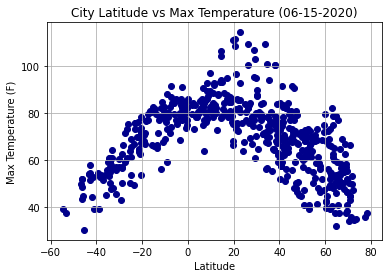

In [10]:
fig1,ax1=plt.subplots()
ax1.scatter(clean_city_data['Lat'],clean_city_data["Max Temp (F)"],color="darkblue")
ax1.set_ylabel("Max Temperature (F)")
ax1.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax1.set_title(f'City Latitude vs Max Temperature ({date})')
ax1.grid()
plt.savefig('Images/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

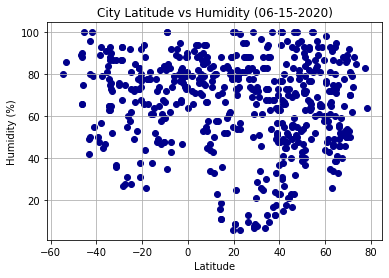

In [11]:
fig2,ax2=plt.subplots()
ax2.scatter(clean_city_data['Lat'],clean_city_data["Humidity (%)"],color="darkblue")
ax2.set_ylabel("Humidity (%)")
ax2.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax2.set_title(f'City Latitude vs Humidity ({date})')
ax2.grid()
plt.savefig('Images/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

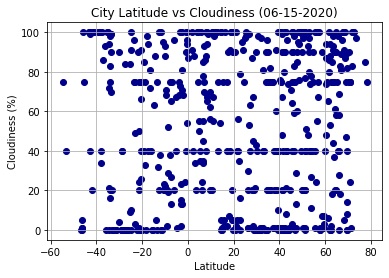

In [12]:
fig3,ax3=plt.subplots()
ax3.scatter(clean_city_data['Lat'],clean_city_data["Cloudiness (%)"],color="darkblue")
ax3.set_ylabel("Cloudiness (%)")
ax3.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax3.set_title(f'City Latitude vs Cloudiness ({date})')
ax3.grid()
plt.savefig('Images/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

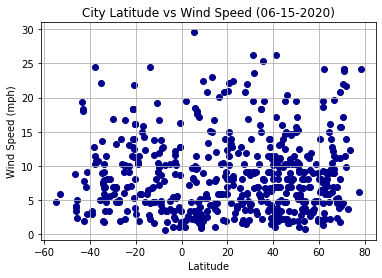

In [13]:
fig4,ax4=plt.subplots()
ax4.scatter(clean_city_data['Lat'],clean_city_data["Wind Speed"],color="darkblue")
ax4.set_ylabel("Wind Speed (mph)")
ax4.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax4.set_title(f'City Latitude vs Wind Speed ({date})')
ax4.grid()
plt.savefig('Images/Fig4.png')
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression (x_axis,y_axis,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig,ax=plt.subplots()
    ax.scatter(x_axis,y_axis,color="darkblue")
    ax.plot(x_axis,regress_values,"r-")
    ax.annotate(line_eq,(x,y),fontsize=10,color="red")
    ax.annotate(f'r^2= {round(rvalue**2,2)}',(x,y-4),fontsize=10,color="red")
   

In [15]:
# Create Northern and Southern Hemisphere DataFrames
NH_df=clean_city_data.loc[clean_city_data['Lat']>0,:]
SH_df=clean_city_data.loc[clean_city_data['Lat']<=0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

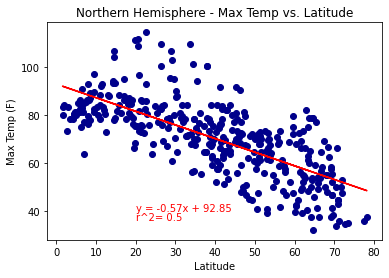

In [16]:
linear_regression(NH_df['Lat'],NH_df['Max Temp (F)'],20,40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

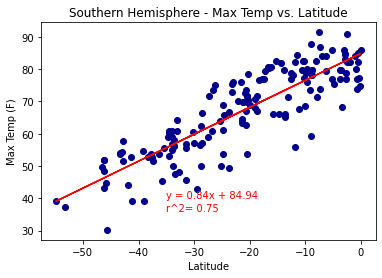

In [17]:
linear_regression(SH_df['Lat'],SH_df['Max Temp (F)'],-35,40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Fig6.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

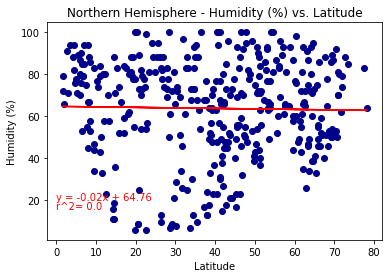

In [18]:
linear_regression(NH_df['Lat'],NH_df['Humidity (%)'],0,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('Images/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

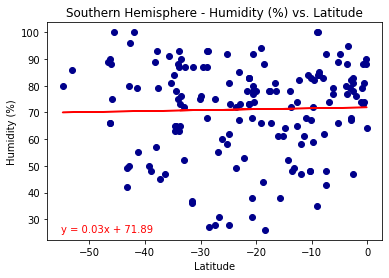

In [19]:
linear_regression(SH_df['Lat'],SH_df['Humidity (%)'],-55,25)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('Images/Fig8.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

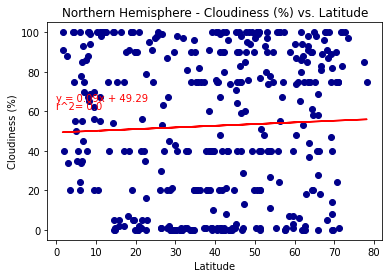

In [20]:
linear_regression(NH_df['Lat'],NH_df['Cloudiness (%)'],0,65)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('Images/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

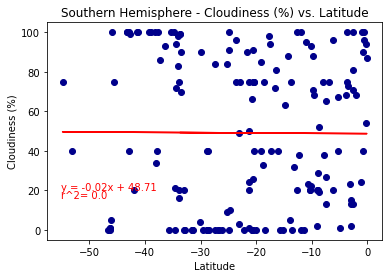

In [21]:
linear_regression(SH_df['Lat'],SH_df['Cloudiness (%)'],-55,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('Images/Fig10.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

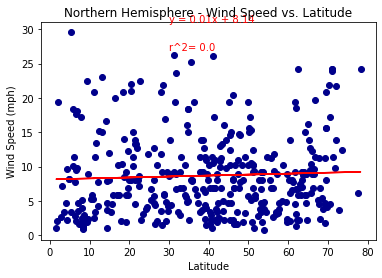

In [22]:
linear_regression(NH_df['Lat'],NH_df['Wind Speed'],30,31)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.savefig('Images/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

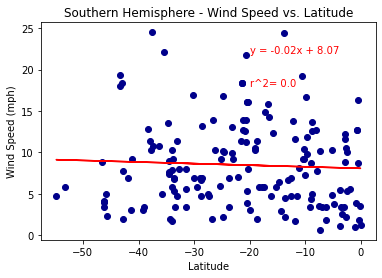

In [23]:
linear_regression(SH_df['Lat'],SH_df['Wind Speed'],-20,22)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.savefig('Images/Fig12.png')
plt.show()